In [1]:
from   astropy.table         import Table
import pylab                 as pl
import numpy                 as np
import pandas                as pd
import os
from   astropy.io            import fits
from   glob                  import glob
from   desitarget.targetmask import desi_mask, bgs_mask, mws_mask
from   scipy.spatial         import KDTree

In [205]:
from io import BytesIO 
from io import StringIO
import requests
import numpy as np 
from PIL import Image
def load_image(url): 
    res = requests.get(url)
    img_arr = np.array(Image.open(BytesIO(res.content)))
    return img_arr

In [2]:
params = {'legend.fontsize': '20',
          'figure.figsize': (10, 10),
         'axes.labelsize': '20',
         'axes.titlesize':'20',
         'xtick.labelsize':'20',
         'ytick.labelsize':'20',
         'axes.labelpad' : '20'}
pl.rcParams.update(params)

In [3]:
data = Table.read('../../data/gama_gold_ddp.fits')

In [4]:
# data.keys()

In [5]:
ra_gama   = data['RA']
dec_gama  = data['DEC']
z_gama    = data['ZGAMA']

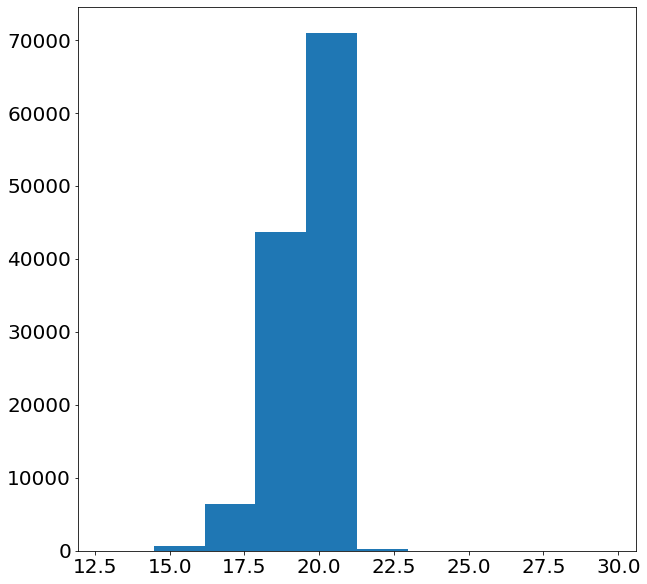

In [6]:
_ = pl.hist(data['GMAG_DRED_SDSS'])

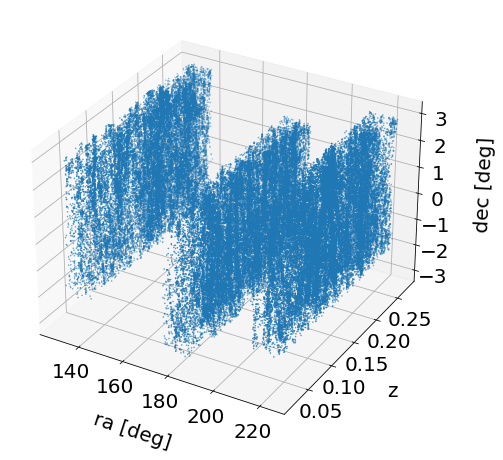

In [7]:
# Plot ra dec redshift
fig = pl.figure(figsize=(8,8))
ax = pl.axes(projection='3d')
ax.scatter(ra_gama, z_gama, dec_gama, s=0.3)
ax.set_xlabel('ra [deg]')
ax.set_zlabel('dec [deg]')
ax.set_ylabel('z ')
pl.show()

In [8]:
# load the DES bright (BGS galaxies)
flavour = 'bright'
if flavour == 'bright':
    df_des = pd.read_csv('./data/DR9_BGSBRIGHT_data.csv')
else:
    df_des = pd.read_csv('./data/DR9_LRG_data.csv')

In [9]:
# df_des

In [10]:
ra_des  = df_des['RA']
dec_des = df_des['DEC']

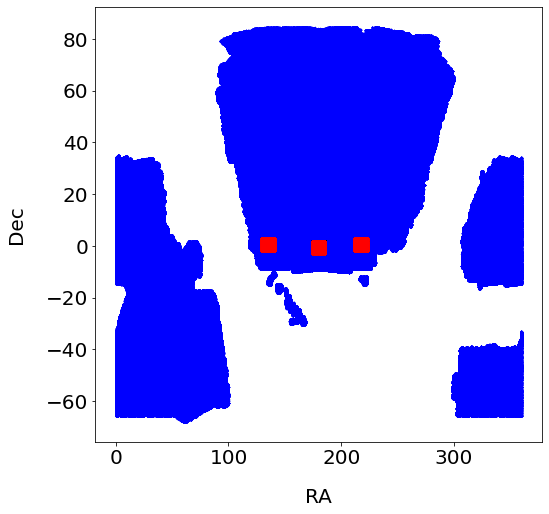

In [11]:
# Plot the GAMA region in the DES catalog
fig = pl.figure(figsize=(8,8))
pl.scatter(ra_des,  dec_des,  s=0.3, c='b')
pl.scatter(ra_gama, dec_gama, s=0.3, c='r')
pl.xlabel('RA')
pl.ylabel('Dec')
pl.show()

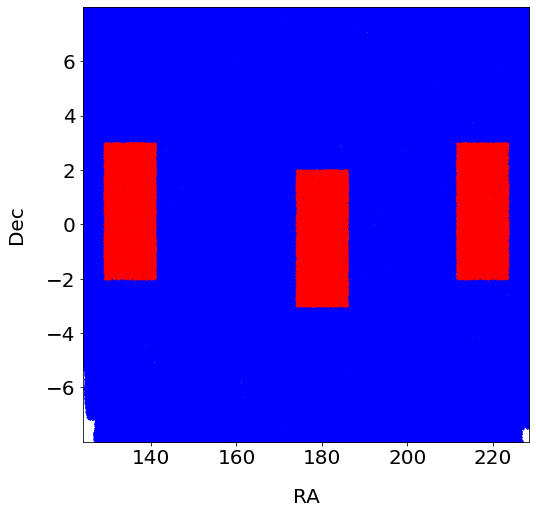

In [12]:
# RA Dec Match zoom in
fig = pl.figure(figsize=(8,8))
pl.scatter(ra_des,  dec_des,  s=0.3, c='b')
pl.scatter(ra_gama, dec_gama, s=0.3, c='r')
pl.xlim(min(ra_gama)-5,max(ra_gama)+5)
pl.ylim(min(dec_gama)-5,max(dec_gama)+5)
pl.xlabel('RA')
pl.ylabel('Dec')
pl.show()

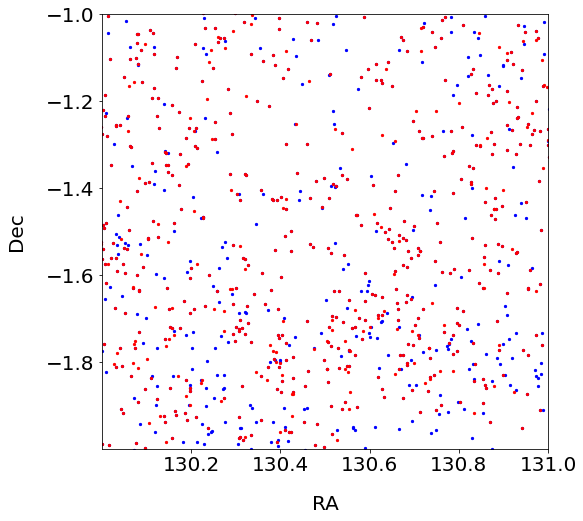

In [13]:
# RA Dec Match zoom in more
fig = pl.figure(figsize=(8,8))
pl.scatter(np.around(ra_des,  3), np.around(dec_des,  3), s=5, c='b')
pl.scatter(np.around(ra_gama, 3), np.around(dec_gama, 3), s=5, c='r')
pl.xlim(min(ra_gama)+1,min(ra_gama)+2)
pl.ylim(min(dec_gama)+1,min(dec_gama)+2)
pl.xlabel('RA')
pl.ylabel('Dec')
pl.show()

In [14]:
# Load trees for des data
tree = KDTree(np.c_[ra_des, dec_des])

In [15]:
# Find the 1-NN for each GAMA RA Dec
distances, indices = tree.query(np.c_[ra_gama, dec_gama], k=1)

In [16]:
len(indices), len(ra_gama)

(121975, 121975)

Text(0.5, 0, 'Distance [Mpc]')

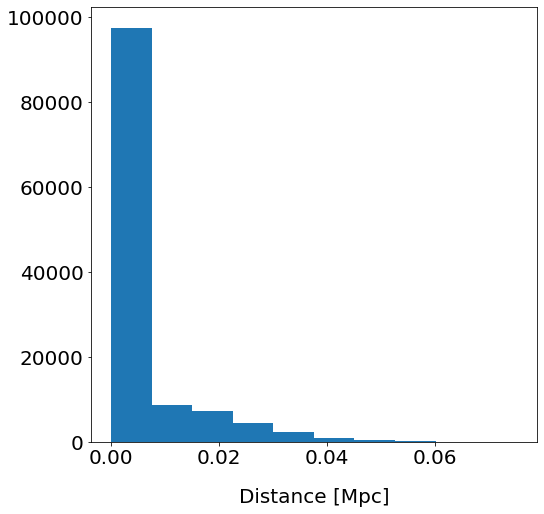

In [17]:
fig = pl.figure(figsize=(8,8))
_ = pl.hist(distances)
pl.xlabel('Distance [Mpc]')

In [18]:
np.shape(indices), indices[0]

((121975,), 8259360)

In [19]:
# Ordening the DES entries using the IDs get for indices
df_des.iloc[indices]

ID          RA       DEC      TARGETID        E1        E2  \
8259360    8259360.0  138.241044  1.389790  3.962782e+16 -0.118534 -0.144397   
8048618    8048618.0  175.447698  0.101483  3.962779e+16 -0.183436  0.181817   
7508779    7508779.0  215.743360  0.113722  3.962779e+16  0.192794  0.274709   
7513186    7513186.0  217.206162  0.625468  3.962781e+16  0.276277  0.107599   
6863995    6863995.0  133.786342 -0.477461  3.962777e+16  0.321978  0.295408   
...              ...         ...       ...           ...       ...       ...   
7491850    7491850.0  220.540384  0.440204  3.962780e+16 -0.004174  0.023976   
7510144    7510144.0  216.369711  0.175900  3.962779e+16  0.643041  0.255638   
12306559  12306559.0  137.391454  2.571390  3.962785e+16  0.009154 -0.006745   
7591914    7591914.0  212.393110  1.437418  3.962782e+16 -0.248450 -0.348727   
8048146    8048146.0  175.130956  1.098892  3.962781e+16 -0.033718  0.042078   

                 E         R        BA       PHI  
8259360   0.186818  1.579568  0.685179 -1.129072  
8048618   0.258276  1.227511  0.589476  1.180313  
7508779   0.335611  0.831682  0.497442  0.479428  
7513186   0.296491  2.547027  0.542626  0.185693  
6863995   0.436962  1.637032  0.391825  0.371194  
...            ...       ...       ...       ...  
7491850   0.024337  1.300240  0.952483  0.871580  
7510144   0.691992  2.672667  0.182039  0.189194  
12306559  0.011371  1.771071  0.977513 -0.317510  
7591914   0.428180  1.257258  0.400384 -1.094914  
8048146   0.053921  4.389577  0.897675  1.123175  

[121975 rows x 10 columns]

In [20]:
# df_match = pd.DataFrame( df_des.iloc[indices], data )
# df_match

In [21]:
len(data), len(df_des.iloc[indices])

(121975, 121975)

In [22]:
data_match = data.copy()

In [23]:
df_des.keys()

Index(['ID', 'RA', 'DEC', 'TARGETID', 'E1', 'E2', 'E', 'R', 'BA', 'PHI'], dtype='object')

In [24]:
# Match GAMA and DES
data_match['RA_DES']              = df_des['RA'].iloc[indices]
data_match['DEC_DES']             = df_des['DEC'].iloc[indices]
data_match['TARGETID_DES']        = np.array(df_des['TARGETID'].iloc[indices], dtype=int)
data_match['E1_DES']              = df_des['E1'].iloc[indices]
data_match['E2_DES']              = df_des['E2'].iloc[indices]
data_match['E_DES']               = df_des['E'].iloc[indices]
data_match['R_DES']               = df_des['R'].iloc[indices]
data_match['BA_DES']              = df_des['BA'].iloc[indices]
data_match['PHI_DES']             = df_des['PHI'].iloc[indices]
# data_match['G_MAG']               = df_des['G_MAG'].iloc[indices]
data_match['DISTANCE_MATCH_DES']  = distances

In [25]:
data_match.keys()

['CATAID',
 'OBJID',
 'RA',
 'DEC',
 'R_PETRO',
 'ZGAMA',
 'NQ',
 'SPECID',
 'SURVEY_CLASS',
 'UMAG_DRED_SDSS',
 'GMAG_DRED_SDSS',
 'RMAG_DRED_SDSS',
 'IMAG_DRED_SDSS',
 'ZMAG_DRED_SDSS',
 'ZSURV',
 'LUMDIST',
 'DISTMOD',
 'FIELD',
 'IN_D8LUMFN',
 'CONSERVATIVE',
 'CARTESIAN_X',
 'CARTESIAN_Y',
 'CARTESIAN_Z',
 'ROTCARTESIAN_X',
 'ROTCARTESIAN_Y',
 'ROTCARTESIAN_Z',
 'GMR',
 'DETMAG',
 'REST_GMR_0P1',
 'REST_GMR_0P1_WARN',
 'REST_GMR_0P1_INDEX',
 'KCORR_R0P1',
 'KCORR_G0P1',
 'KCORR_R0P0',
 'KCORR_G0P0',
 'REST_GMR_0P0',
 'Q_COLOR_0P0',
 'EQ_ALL_0P0',
 'EQ_COLOR_0P0',
 'MALL_0P0',
 'MCOLOR_0P0',
 'MQZERO_0P0',
 'Z_THETA_QALL',
 'Z_THETA_QZERO',
 'Z_THETA_QCOLOR',
 'DDPKCORR_R0P1',
 'DDPKCORR_G0P1',
 'DDPKCORR_R0P0',
 'DDPKCORR_G0P0',
 'DDPMALL_0P0',
 'DELTA_DETMAG_FAINT',
 'ZMAX',
 'ZMAX_WARN',
 'DELTA_DETMAG_BRIGHT',
 'ZMIN',
 'ZMIN_WARN',
 'VMAX',
 'DDP',
 'DDPZLIMS',
 'STEPWISE_FAINTLIM_0P0',
 'STEPWISE_BRIGHTLIM_0P0',
 'RA_DES',
 'DEC_DES',
 'TARGETID_DES',
 'E1_DES',
 'E2_DES',
 '

In [26]:
data_match.write('./data/gamades_gold_ddp.fits', overwrite=True)

In [27]:
data_match.info

<Table length=121975>
         name           dtype  shape unit    class     n_bad
---------------------- ------- ----- ---- ------------ -----
                CATAID   int32            MaskedColumn     0
                 OBJID   int64            MaskedColumn     0
                    RA float64        deg       Column     0
                   DEC float64        deg       Column     0
               R_PETRO float32        mag       Column     0
                 ZGAMA float32                  Column     0
                    NQ   int16            MaskedColumn     0
                SPECID bytes33                  Column     0
          SURVEY_CLASS   int16            MaskedColumn     0
        UMAG_DRED_SDSS float32        mag       Column     0
        GMAG_DRED_SDSS float32        mag       Column     0
        RMAG_DRED_SDSS float32        mag       Column     0
        IMAG_DRED_SDSS float32        mag       Column     0
        ZMAG_DRED_SDSS float32        mag       Column     0
  

In [28]:
# Filter for ddp1
ii_ddp1 = data_match['DDP'][:,0] == 1
sum(ii_ddp1), len(ii_ddp1)

(50872, 121975)

In [29]:
# Filter the match using a distance less than 0.0001 
ii_distance = data_match['DISTANCE_MATCH_DES'] < 0.0001
sum(ii_distance)

88976

In [30]:
# Finally data lenght for ddp1 and minimal distance match with NN
len(data_match['RA'][ii_ddp1 & ii_distance])

43446

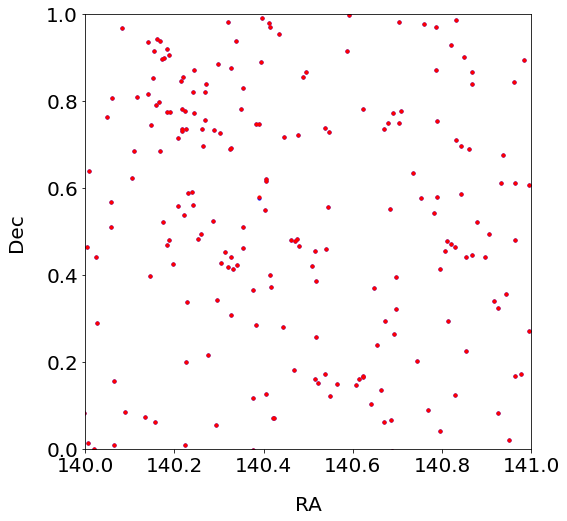

In [31]:
# Apply the filters iiddp1 and ii_distance
fig = pl.figure(figsize=(8,8))
pl.scatter( data_match['RA'][ii_ddp1 & ii_distance], data_match['DEC'][ii_ddp1 & ii_distance], s=10, c='b' )
pl.scatter( data_match['RA_DES'][ii_ddp1 & ii_distance], data_match['DEC_DES'][ii_ddp1 & ii_distance], s=10, c='r')
pl.xlim(140,141)
pl.ylim(0,1)
pl.xlabel('RA')
pl.ylabel('Dec')
pl.show()

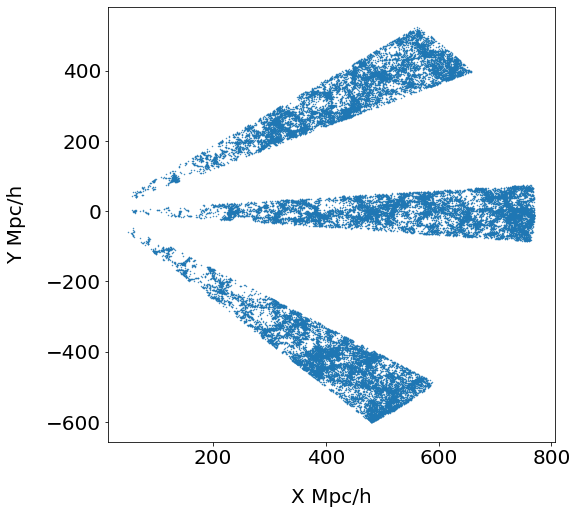

In [32]:
fig = pl.figure(figsize=(8,8))
pl.scatter( data_match['ROTCARTESIAN_X'][ii_ddp1 & ii_distance], data_match['ROTCARTESIAN_Y'][ii_ddp1 & ii_distance], s=0.2 )
pl.xlabel('X Mpc/h')
pl.ylabel('Y Mpc/h')
pl.show()

### G15

In [33]:
ii_g15 = data_match['FIELD'] == 'G15'
sum(ii_g15)

41178

In [34]:
# Number of points in G15 for DDP1 matched with DES
len(data_match['RA'][ii_ddp1 & ii_distance & ii_g15])

13917

In [35]:
idx = np.arange(0,sum( ii_ddp1 & ii_distance & ii_g15 ))
idx

array([    0,     1,     2, ..., 13914, 13915, 13916])

In [36]:
xyz_labels = ['ROTCARTESIAN_X','ROTCARTESIAN_Y','ROTCARTESIAN_Z']
df_pos = data[xyz_labels].to_pandas()
df_pos = df_pos[ii_ddp1 & ii_distance & ii_g15]
df_pos

ROTCARTESIAN_X  ROTCARTESIAN_Y  ROTCARTESIAN_Z
10          376.361051      259.703020      -14.427125
24          609.593909      452.947333      -16.324600
31          405.860384      283.908626        4.539176
53          467.229273      373.702543      -10.689510
63          481.288111      325.743350       10.289737
...                ...             ...             ...
121905      407.589286      340.443790      -12.238181
121914      315.898864      247.876021      -13.606974
121929      276.450757      210.851126        0.188152
121933      358.783727      226.700636        8.862379
121970      395.109849      333.191916        3.537985

[13917 rows x 3 columns]

In [37]:
np.savetxt('./data/GAMADES_pos_ddp1_g15.txt', np.c_[np.arange(len(df_pos.values)), df_pos.values] , fmt='%d', header='id px py pz')

In [38]:
f = open('./data/GAMADES_pos_ddp1_g15.txt.NDnet_s3.5.up.NDskl.S010.a.NDskl')
doc = f.readlines()

In [39]:
# Number of filaments from Disperse
doc = np.array(doc)
ii = np.where(doc=='[FILAMENTS]\n')[0][0]
N_fila = int(doc[ii+1])
N_fila

324

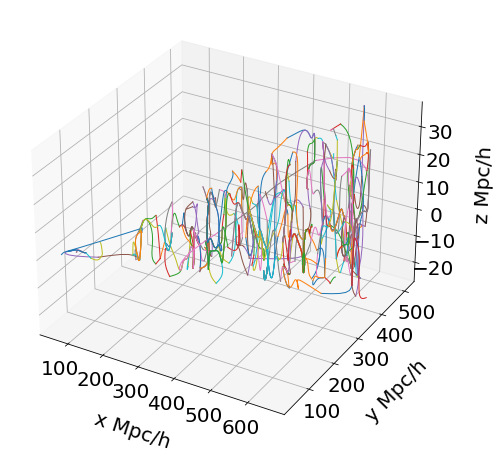

In [40]:
FILA = np.zeros(N_fila, dtype=object)
jj = ii+2
jj_new = 0
# print(doc[jj][0].replace('\n','').split(' ')[2])
fig = pl.figure(figsize=(8,8), rasterized=True)
ax = pl.axes(projection='3d')
ax.set_xlabel('x Mpc/h')
ax.set_ylabel('y Mpc/h')
ax.set_zlabel('z Mpc/h')
for i in range(N_fila):
    jj_new = jj + int(doc[jj].replace('\n','').split(' ')[2]) + 1
    FILA[i] = np.array([a.replace('\n','').split(' ')[1:] for a in doc[jj+1:jj_new]], dtype=float)
    # print(jj,jj_new)
    # print(doc[jj].replace('\n',''),doc[jj_new])
    ax.plot3D(FILA[i][:,0], FILA[i][:,1], FILA[i][:,2], lw=1) 
    jj = jj_new

pl.savefig('./figs/GAMADES_ddp1_g15.pdf', bbox_inches='tight')
pl.show()

In [41]:
sum(ii_ddp1 & ii_distance & ii_g15), sum(ii_ddp1 & ii_g15)

(13917, 16318)

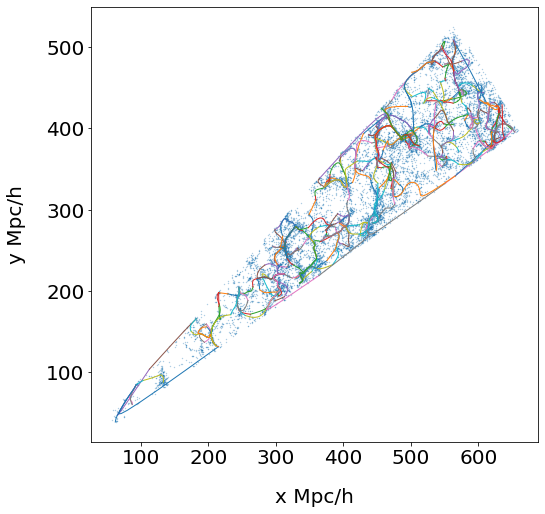

In [42]:
fig = pl.figure(figsize=(8,8), rasterized=True)
pl.scatter( data_match['ROTCARTESIAN_X'][ii_ddp1 & ii_distance & ii_g15], data_match['ROTCARTESIAN_Y'][ii_ddp1 & ii_distance & ii_g15], s=0.1, alpha=0.5 )
jj = ii+2
jj_new = 0
fila_x = []
fila_y = []
fila_z = []
for i in range(N_fila):
    jj_new = jj + int(doc[jj].replace('\n','').split(' ')[2]) + 1
    FILA[i] = np.array([a.replace('\n','').split(' ')[1:] for a in doc[jj+1:jj_new]], dtype=float)
    fila_x.append( FILA[i][:,0] ) 
    fila_y.append( FILA[i][:,1] ) 
    fila_z.append( FILA[i][:,2] ) 
    # print(jj,jj_new)
    # print(doc[jj].replace('\n',''),doc[jj_new])
    pl.plot(FILA[i][:,0], FILA[i][:,1], lw=1) 
    jj = jj_new
pl.xlabel('x Mpc/h')
pl.ylabel('y Mpc/h')
pl.show()

In [43]:
#Lenght of each filament
LEN_FILA = np.array([len(i) for i in FILA])
# LEN_FILA

## Finding the nearest Filament

In [44]:
def get_ID_FILA(pos,L):
    total = 0
    for i,l in enumerate(L):
        total += l
        if pos < total:
            return i

def get_distance(x1,y1,z1,x2,y2,z2):
    return np.sqrt( (x1-x2)**2 +(y1-y2)**2 +(z1-z2)**2   )

In [45]:
# Extend all the filaments
fila_x_arr = np.concatenate(fila_x).ravel()
fila_y_arr = np.concatenate(fila_y).ravel()
fila_z_arr = np.concatenate(fila_z).ravel()
len(fila_x_arr)

7529

In [46]:
id_fila_arr = np.zeros(len(fila_x_arr))
for i in  np.arange(len(fila_x_arr)):
    id_fila_arr[i] = get_ID_FILA(i, LEN_FILA)

In [47]:
df_fila = pd.DataFrame()
df_fila['id_fila'] = id_fila_arr
df_fila['x_fila'] = fila_x_arr
df_fila['y_fila'] = fila_y_arr
df_fila['z_fila'] = fila_z_arr
df_fila.to_csv('./data/filaments_ddp1_g15.csv')

In [48]:
# Find the nearest filament point to each galaxy
tree_fila = KDTree(np.c_[fila_x_arr, fila_y_arr, fila_z_arr])
distances_fila, indices_fila = tree_fila.query(np.c_[df_pos], k=1)

In [49]:
ID_FILA = np.zeros(len(indices_fila), dtype=int)
ID_FILA_NEXT = np.zeros(len(indices_fila), dtype=int)
ID_FILA_LAST = np.zeros(len(indices_fila), dtype=int)
ID_FILA_SEGMENTS = np.zeros(len(indices_fila), dtype=object)
for i, index in enumerate(indices_fila):
    ID_FILA[i] = get_ID_FILA(index, LEN_FILA)
    ID_FILA_NEXT[i] = get_ID_FILA(index+1, LEN_FILA)
    ID_FILA_LAST[i] = get_ID_FILA(index-1, LEN_FILA)
    
    if (get_ID_FILA(index, LEN_FILA) == get_ID_FILA(index+1, LEN_FILA)) & (get_ID_FILA(index, LEN_FILA) != get_ID_FILA(index-1, LEN_FILA)):
        ID_FILA_SEGMENTS[i] = np.array([index,index+1])
    elif (get_ID_FILA(index, LEN_FILA) != get_ID_FILA(index+1, LEN_FILA)) & (get_ID_FILA(index, LEN_FILA) == get_ID_FILA(index-1, LEN_FILA)):
        ID_FILA_SEGMENTS[i] = np.array([index,index-1])
    elif (get_ID_FILA(index, LEN_FILA) == get_ID_FILA(index+1, LEN_FILA)) & (get_ID_FILA(index, LEN_FILA) == get_ID_FILA(index-1, LEN_FILA)):
        d_next = get_distance(fila_x_arr[index],fila_y_arr[index],fila_z_arr[index],fila_x_arr[index+1],fila_y_arr[index+1],fila_z_arr[index+1])
        d_last = get_distance(fila_x_arr[index],fila_y_arr[index],fila_z_arr[index],fila_x_arr[index-1],fila_y_arr[index-1],fila_z_arr[index-1])
        if d_next < d_last:
            ID_FILA_SEGMENTS[i] = np.array([index,index+1])
        elif d_next >= d_last:
            ID_FILA_SEGMENTS[i] = np.array([index,index-1])

In [50]:
ID_FILA_SEGMENTS

array([array([4995, 4996]), array([6360, 6359]), array([5251, 5252]), ...,
       array([3653, 3652]), array([4165, 4166]), array([4831, 4832])],
      dtype=object)

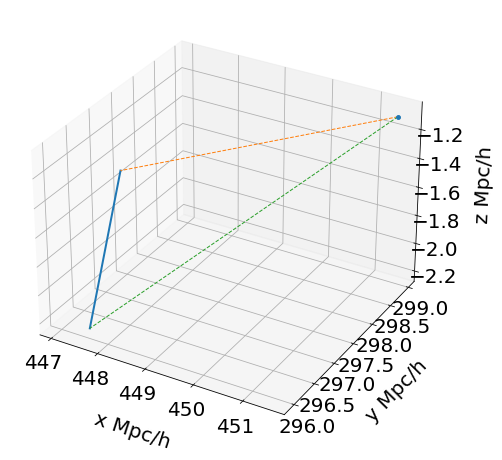

In [51]:
# plot the segment
fig = pl.figure(figsize=(8,8), rasterized=True)
ax = pl.axes(projection='3d')
ax.set_xlabel('x Mpc/h')
ax.set_ylabel('y Mpc/h')
ax.set_zlabel('z Mpc/h')
for N in [10]:
    ax.scatter3D(np.array(df_pos['ROTCARTESIAN_X'])[N],
                 np.array(df_pos['ROTCARTESIAN_Y'])[N],
                 np.array(df_pos['ROTCARTESIAN_Z'])[N], s=15)
    
    ax.plot3D(fila_x_arr[ID_FILA_SEGMENTS[N]],
              fila_y_arr[ID_FILA_SEGMENTS[N]],
              fila_z_arr[ID_FILA_SEGMENTS[N]], lw=2)
    
    ax.plot3D([np.array(df_pos['ROTCARTESIAN_X'])[N], fila_x_arr[ID_FILA_SEGMENTS[N]][0]],
              [np.array(df_pos['ROTCARTESIAN_Y'])[N], fila_y_arr[ID_FILA_SEGMENTS[N]][0]],
              [np.array(df_pos['ROTCARTESIAN_Z'])[N], fila_z_arr[ID_FILA_SEGMENTS[N]][0]], '--', lw=1)
    
    ax.plot3D([np.array(df_pos['ROTCARTESIAN_X'])[N], fila_x_arr[ID_FILA_SEGMENTS[N]][1]],
              [np.array(df_pos['ROTCARTESIAN_Y'])[N], fila_y_arr[ID_FILA_SEGMENTS[N]][1]],
              [np.array(df_pos['ROTCARTESIAN_Z'])[N], fila_z_arr[ID_FILA_SEGMENTS[N]][1]], '--', lw=1)


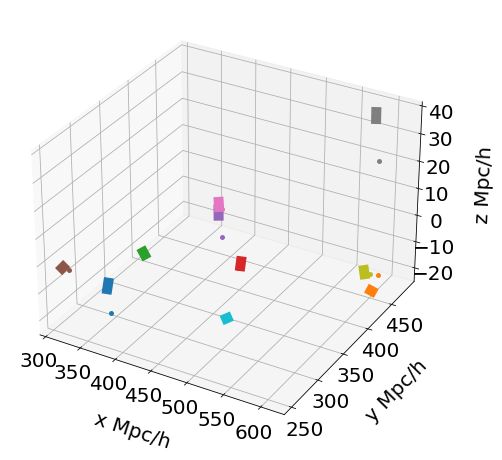

In [52]:
# plot segments and galaxies
fig = pl.figure(figsize=(8,8), rasterized=True)
ax = pl.axes(projection='3d')
ax.set_xlabel('x Mpc/h')
ax.set_ylabel('y Mpc/h')
ax.set_zlabel('z Mpc/h')
for N in np.arange(10):
    ax.scatter3D(np.array(df_pos['ROTCARTESIAN_X'])[N],
                 np.array(df_pos['ROTCARTESIAN_Y'])[N],
                 np.array(df_pos['ROTCARTESIAN_Z'])[N], s=15)
    
    ax.plot3D(fila_x_arr[ID_FILA_SEGMENTS[N]],
              fila_y_arr[ID_FILA_SEGMENTS[N]],
              fila_z_arr[ID_FILA_SEGMENTS[N]], lw=10)
    
#     ax.plot3D([np.array(df_pos['ROTCARTESIAN_X'])[N], fila_x_arr[ID_FILA_SEGMENTS[N]][0]],
#               [np.array(df_pos['ROTCARTESIAN_Y'])[N], fila_y_arr[ID_FILA_SEGMENTS[N]][0]],
#               [np.array(df_pos['ROTCARTESIAN_Z'])[N], fila_z_arr[ID_FILA_SEGMENTS[N]][0]], '--', lw=1)
    
#     ax.plot3D([np.array(df_pos['ROTCARTESIAN_X'])[N], fila_x_arr[ID_FILA_SEGMENTS[N]][1]],
#               [np.array(df_pos['ROTCARTESIAN_Y'])[N], fila_y_arr[ID_FILA_SEGMENTS[N]][1]],
#               [np.array(df_pos['ROTCARTESIAN_Z'])[N], fila_z_arr[ID_FILA_SEGMENTS[N]][1]], '--', lw=1)


In [53]:
# df_filaments = pd.DataFrame()
# df_filaments['FILAMENTS'] = FILA    #Save the filaments
# df_filaments['LEN_FILA'] = LEN_FILA # Save the number of point of each filament
# df_filaments['ID_FILA_SEGMENT'] = ID_FILA_SEGMENTS # Save the ids of the nearest filament segments by galaxy

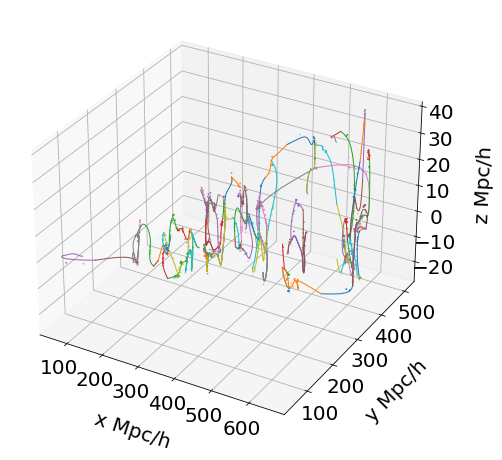

In [54]:
Ns = np.arange(100)
fig = pl.figure(figsize=(8,8))
ax = pl.axes(projection='3d')
ax.set_xlabel('x Mpc/h')
ax.set_ylabel('y Mpc/h')
ax.set_zlabel('z Mpc/h')

min_dis_fil = 2

for N in Ns:
    ii_fila = ID_FILA == N
    ii_fila_distance = distances_fila[ii_fila] < min_dis_fil
    # print(sum(ii_fila_distance))

    ax.scatter3D(data_match[ii_ddp1 & ii_g15 & ii_distance]['ROTCARTESIAN_X'][ii_fila][ii_fila_distance],
                 data_match[ii_ddp1 & ii_g15 & ii_distance]['ROTCARTESIAN_Y'][ii_fila][ii_fila_distance],
                 data_match[ii_ddp1 & ii_g15 & ii_distance]['ROTCARTESIAN_Z'][ii_fila][ii_fila_distance], s=0.5)
    ax.plot3D(FILA[N][:,0], FILA[N][:,1], FILA[N][:,2], lw=1)

Text(0, 0.5, 'y Mpc/h')

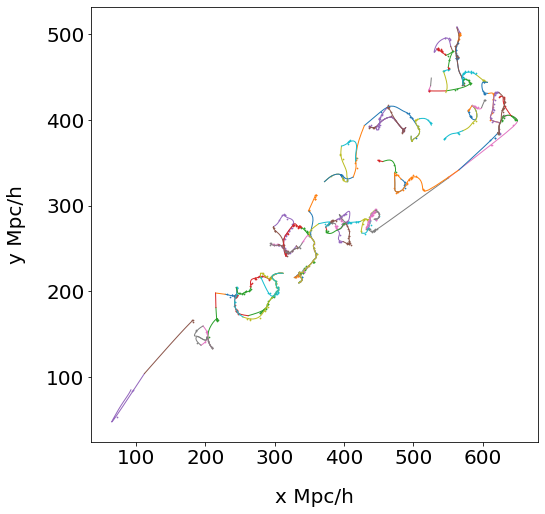

In [55]:
Ns = np.arange(100)
fig = pl.figure(figsize=(8,8))

for N in Ns:
    ii_fila = ID_FILA == N
    ii_fila_distance = distances_fila[ii_fila] < min_dis_fil
    # print(sum(ii_fila_distance))

    pl.scatter(data_match[ii_ddp1 & ii_g15 & ii_distance]['ROTCARTESIAN_X'][ii_fila][ii_fila_distance],
                 data_match[ii_ddp1 & ii_g15 & ii_distance]['ROTCARTESIAN_Y'][ii_fila][ii_fila_distance], s=0.5)
    pl.plot(FILA[N][:,0], FILA[N][:,1], lw=1)
pl.xlabel('x Mpc/h')
pl.ylabel('y Mpc/h')

Text(0.5, 0, 'Number of galaxies by filament \n distance< 2 Mpc/h')

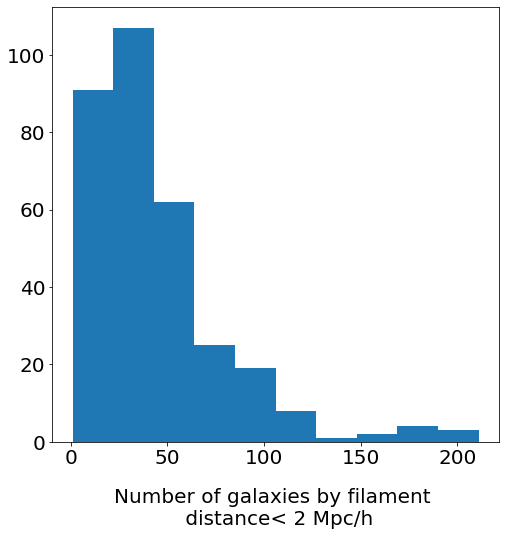

In [56]:
fig = pl.figure(figsize=(8,8))
_, counts = np.unique(ID_FILA, return_counts=True)
pl.hist(counts)
pl.xlabel(f'Number of galaxies by filament \n distance< {min_dis_fil} Mpc/h') # Number of points by filament with a minimal distance of min_dist to filament

## Computing the tilt of the Segments

In [57]:
from astropy.coordinates import SkyCoord

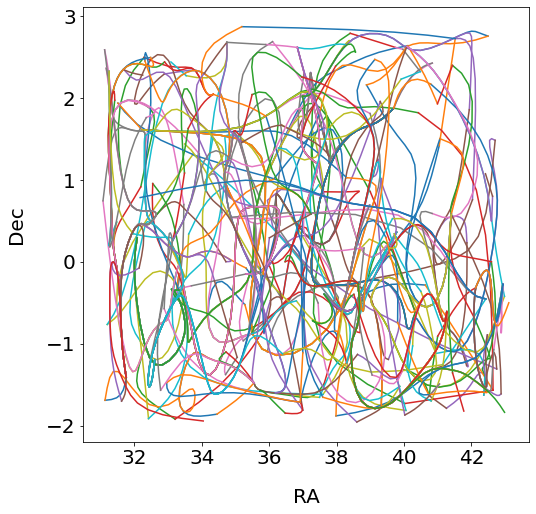

In [58]:
# Projection of the filaments in the RADEC space
Ns = np.arange(1)
fig = pl.figure(figsize=(8,8))

for fil in FILA:
    # print(sum(ii_fila_distance))    
    c = SkyCoord(x=fil[:,0], y=fil[:,1], z=fil[:,2], unit='Mpc/h', representation_type='cartesian')
    c.representation_type = 'spherical'
    pl.plot(c.to_table()['ra'], c.to_table()['dec'])
    
pl.xlabel('RA')
pl.ylabel('Dec')
pl.show()

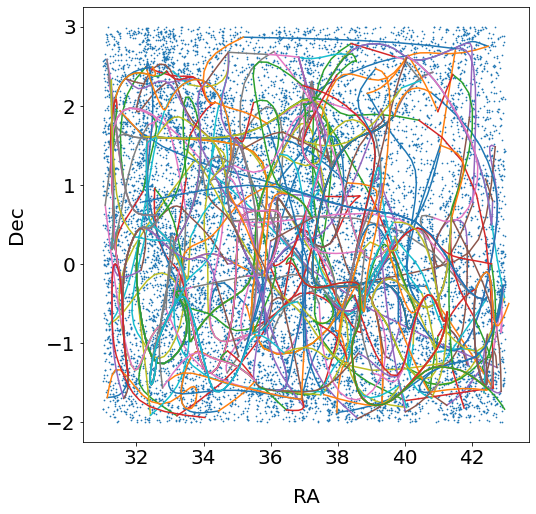

In [59]:
# Filaments and galaxies projected in RADEC
fig = pl.figure(figsize=(8,8))

for fil in FILA:
    # print(sum(ii_fila_distance))    
    c = SkyCoord(x=fil[:,0], y=fil[:,1], z=fil[:,2], unit='Mpc/h', representation_type='cartesian')
    c.representation_type = 'spherical'
    pl.plot(c.to_table()['ra'], c.to_table()['dec'])
    
pl.scatter(data_match[ii_ddp1 & ii_g15 & ii_distance]['RA']-180.5,
           data_match[ii_ddp1 & ii_g15 & ii_distance]['DEC'], s=0.5)
pl.xlabel('RA')
pl.ylabel('Dec')
pl.show()

In [60]:
len(ID_FILA_SEGMENTS)

13917

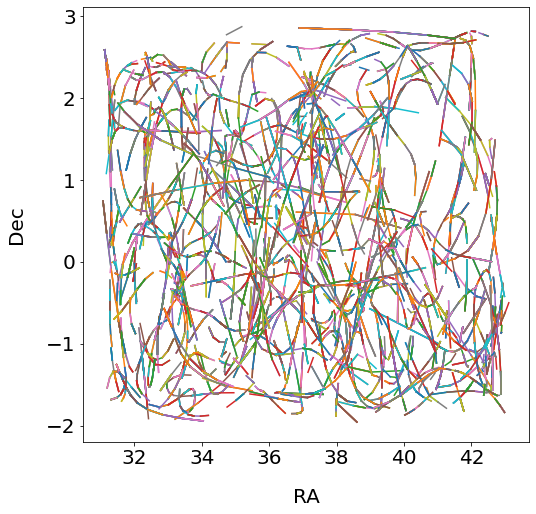

In [197]:
# Filaments and galaxies projected in RADEC
fig = pl.figure(figsize=(8,8))

c = SkyCoord(x=fila_x_arr, y=fila_y_arr, z=fila_z_arr, unit='Mpc/h', representation_type='cartesian')
c.representation_type = 'spherical'

ra_fila_segment   = []
dec_fila_segment  = []
tilt_fila_segment = []

for i, ifs in enumerate(ID_FILA_SEGMENTS):
    ra_ = [c.to_table()[ 'ra'][ifs[0]].to_value(), c.to_table()[ 'ra'][ifs[1]].to_value()]
    dec_ = [c.to_table()['dec'][ifs[0]].to_value(), c.to_table()['dec'][ifs[1]].to_value()]
    ra_fila_segment.append(ra_)
    dec_fila_segment.append(dec_)
    
    tilt_temp = np.arctan2( dec_[1] - dec_[0], ra_[1]-ra_[0] )*180/np.pi
    
    if tilt_temp < 0:
        tilt_temp = tilt_temp + 180
    
    # print(tilt_temp)
    tilt_fila_segment.append(tilt_temp)
    
    pl.plot(ra_,dec_)
    
    # pl.axis('equal')
    
# pl.scatter(data_match[ii_ddp1 & ii_g15 & ii_distance]['RA'],
#            data_match[ii_ddp1 & ii_g15 & ii_distance]['DEC'], s=5)
pl.xlabel('RA')
pl.ylabel('Dec')
pl.show()

In [198]:
c = SkyCoord(x=fila_x_arr, y=fila_y_arr, z=fila_z_arr, unit='Mpc/h', representation_type='cartesian')
c.representation_type = 'spherical'

[c.to_table()[ 'ra'][ifs[0]].to_value(), c.to_table()[ 'ra'][ifs[1]].to_value()],
[c.to_table()['dec'][ifs[0]].to_value(), c.to_table()['dec'][ifs[1]].to_value()]

df_segments = pd.DataFrame()
x_fila_segment = [ fila_x_arr[ids] for ids in ID_FILA_SEGMENTS]
y_fila_segment = [ fila_y_arr[ids] for ids in ID_FILA_SEGMENTS]
z_fila_segment = [ fila_z_arr[ids] for ids in ID_FILA_SEGMENTS]

df_segments['PHI_DES'] = data_match['PHI_DES'][ii_ddp1 & ii_distance & ii_g15]*180/np.pi + 90
df_segments['RA_DES'] = data_match['RA_DES'][ii_ddp1 & ii_distance & ii_g15]
df_segments['DEC_DES'] = data_match['DEC_DES'][ii_ddp1 & ii_distance & ii_g15]
df_segments['X_NEAREST_SEGMENT']   = x_fila_segment
df_segments['Y_NEAREST_SEGMENT']   = y_fila_segment
df_segments['Z_NEAREST_SEGMENT']   = z_fila_segment
df_segments['RA_NEAREST_SEGMENT']  = ra_fila_segment
df_segments['DEC_NEAREST_SEGMENT'] = dec_fila_segment
df_segments['TILT_NEAREST_SEGMENT'] = tilt_fila_segment

df_segments

PHI_DES      RA_DES   DEC_DES   X_NEAREST_SEGMENT  \
0      139.377087  215.005543 -1.755388    [369.5, 369.996]   
1      174.318945  217.012241 -1.180989    [607.0, 605.538]   
2      129.881014  215.373546  0.576523  [406.823, 405.982]   
3      131.755668  219.052598 -0.974528  [468.717, 469.809]   
4      163.336902  214.490916  1.066348  [467.946, 467.305]   
...           ...         ...       ...                 ...   
13912  165.193990  220.269321 -1.271924  [403.892, 404.181]   
13913  126.507863  218.518412 -1.891449  [309.296, 310.325]   
13914   38.508454  217.732593  0.080925  [276.124, 274.732]   
13915   13.287454  212.687331  1.249352  [360.667, 359.753]   
13916  139.937876  220.540384  0.440204  [395.247, 396.366]   

        Y_NEAREST_SEGMENT     Z_NEAREST_SEGMENT  \
0        [262.5, 263.852]      [-6.5, -4.36294]   
1        [444.0, 444.083]     [-21.0, -20.9242]   
2        [282.8, 281.547]    [5.46186, 6.54698]   
3         [376.7, 376.41]  [-10.4756, -8.57303]   
4       [336.89, 337.841]    [17.1486, 14.7309]   
...                   ...                   ...   
13912    [340.1, 338.106]  [-12.0649, -10.8665]   
13913  [253.581, 254.393]  [-10.1086, -9.46297]   
13914   [216.09, 215.574]     [3.2417, 4.32228]   
13915  [228.297, 228.027]    [7.40645, 6.22541]   
13916  [334.662, 334.031]    [3.83627, 1.61215]   

                             RA_NEAREST_SEGMENT  \
0          [35.390728179552916, 35.49347370362]   
1       [36.184209617333416, 36.25517907068506]   
2       [34.80480960075919, 34.741163599943654]   
3      [38.788256796298974, 38.701635354075776]   
4        [35.75137771524964, 35.86527734968636]   
...                                         ...   
13912      [40.099282449802, 39.91319851679061]   
13913   [39.347131145043384, 39.34363734674358]   
13914    [38.04613613646849, 38.12021854168731]   
13915   [32.33321939668164, 32.368289549928306]   
13916     [40.2551266785092, 40.12196940519353]   

                              DEC_NEAREST_SEGMENT  TILT_NEAREST_SEGMENT  
0      [-0.8216132145833864, -0.5500634842442018]             69.274999  
1       [-1.5994849102246884, -1.596112443283722]              2.720648  
2        [0.6315923277449197, 0.7592121452660358]            116.506151  
3      [-0.9980315994584253, -0.8158879866499942]            115.434206  
4        [1.7035236331014678, 1.4633721339573895]            115.374163  
...                                           ...                   ...  
13912   [-1.308961683816565, -1.1813540434291907]            145.559497  
13913    [-1.4477898795970097, -1.35093108709277]             92.065823  
13914    [0.5297093279593386, 0.7091249563360383]             67.563808  
13915    [0.9940648510238679, 0.8373727857583184]            102.615785  
13916    [0.424403748238328, 0.17819963726850752]             61.593661  

[13917 rows x 9 columns]

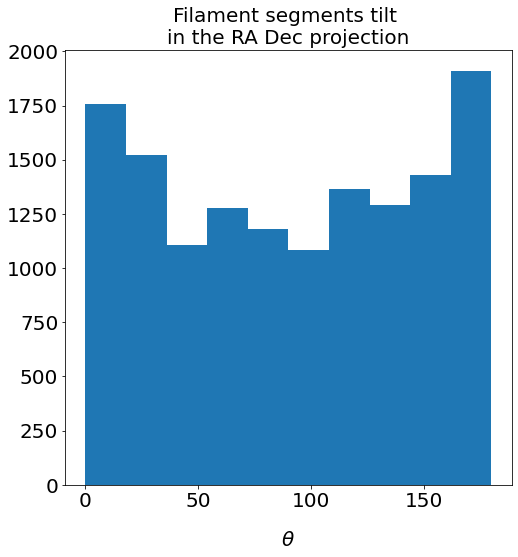

In [199]:
fig = pl.figure(figsize=(8,8))
_ = pl.hist(np.array(tilt_fila_segment))
len(tilt_fila_segment)
pl.title('Filament segments tilt \nin the RA Dec projection')
pl.xlabel(r'$\theta$')
pl.show()

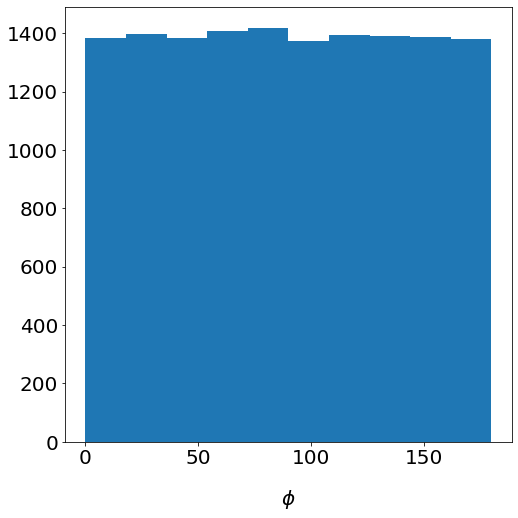

In [200]:
fig = pl.figure(figsize=(8,8))
_ = pl.hist(df_segments['PHI_DES'])
pl.xlabel(r'$\phi$')
pl.show()

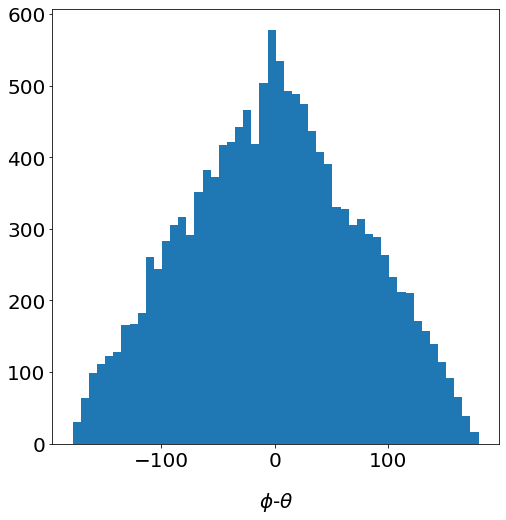

In [201]:
fig = pl.figure(figsize=(8,8))
diff = df_segments['PHI_DES'] - df_segments['TILT_NEAREST_SEGMENT']
_ = pl.hist(diff, bins=50)
pl.xlabel(r'$\phi$-$\theta$')
pl.show()

15


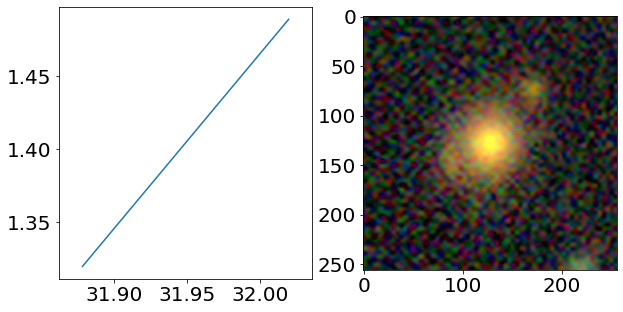

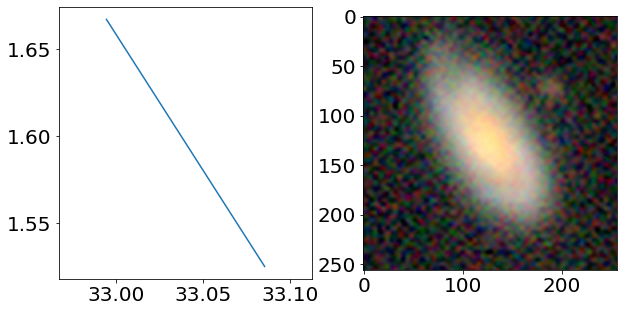

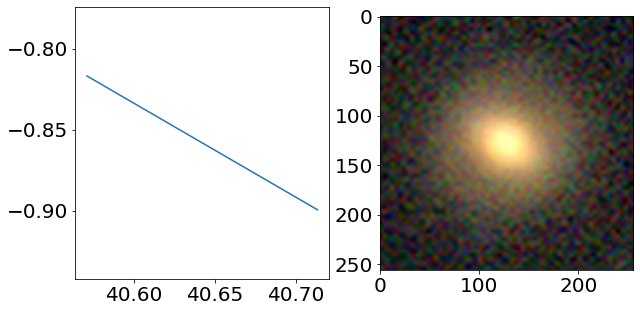

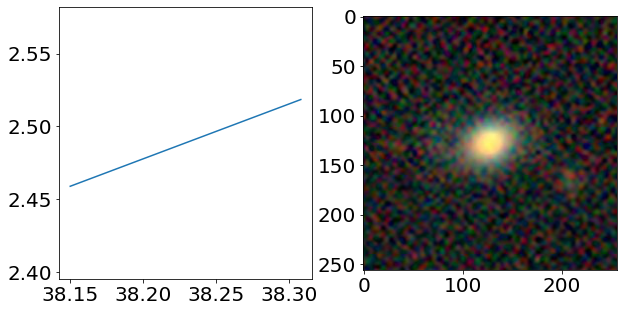

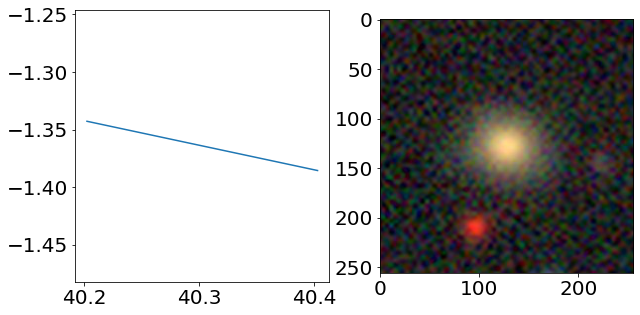

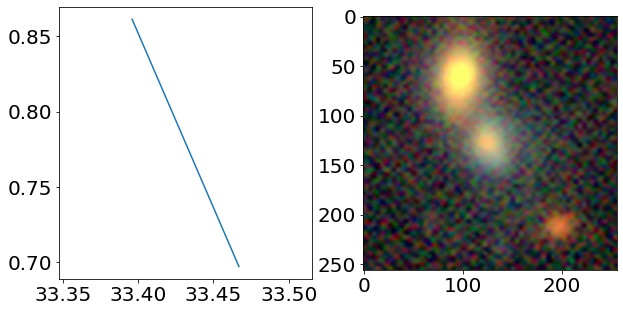

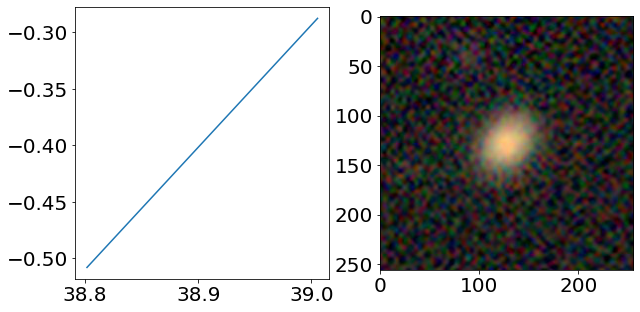

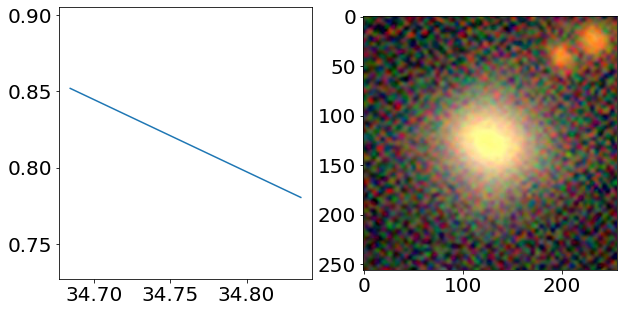

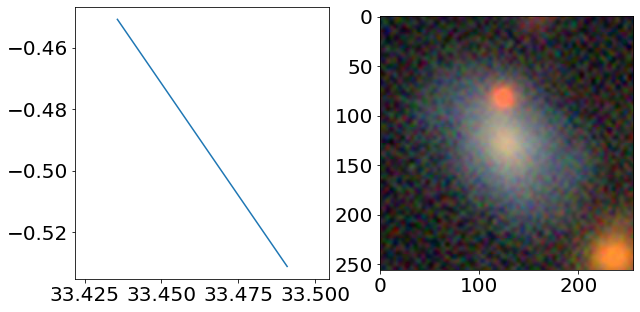

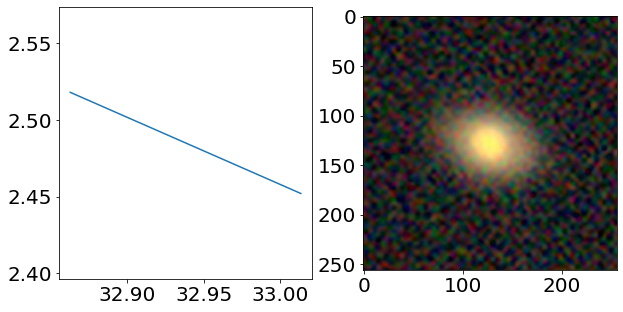

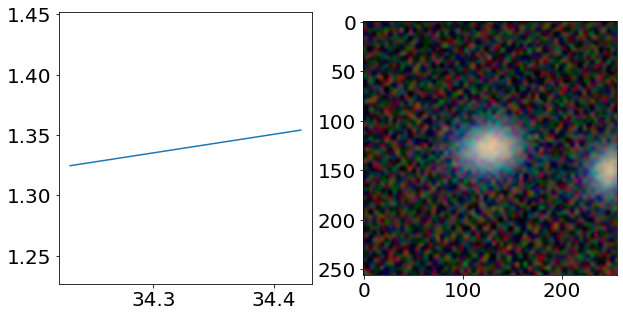

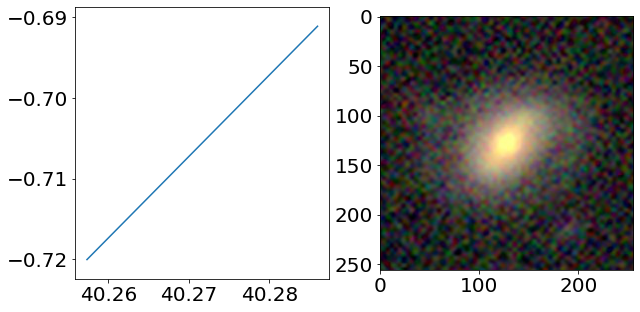

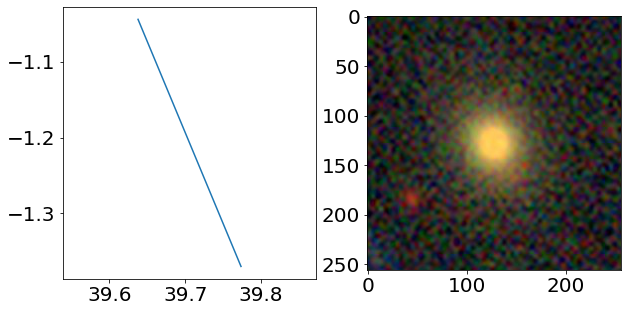

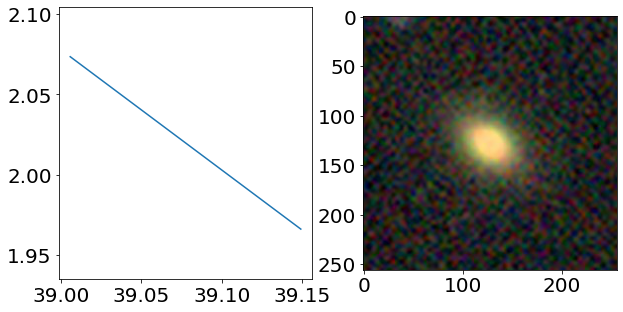

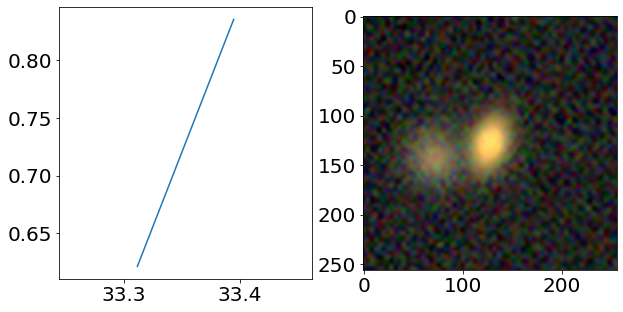

In [224]:
ii_diff = (diff < 0.1) & (diff > -0.1) # For a difference less than 0.2 degrees
ii_aligned = np.where(ii_diff == True)[0]
print(len(ii_aligned))

for ii_al in ii_aligned:
    fig = pl.figure(figsize=(10,5))
    
    pl.subplot(1,2,1)
    pl.plot(np.array(df_segments['RA_NEAREST_SEGMENT'])[ii_al], np.array(df_segments['DEC_NEAREST_SEGMENT'])[ii_al])
    pl.axis('equal')

    # print(np.array(df_segments['TILT_NEAREST_SEGMENT'])[ii_al])
    # print(np.array(df_segments['PHI_DES'])[ii_al])
    # print(np.array(df_segments['RA_DES'])[ii_al], np.array(df_segments['DEC_DES'])[ii_al])

    ra__ = np.array(df_segments['RA_DES'])[ii_al]
    dec__ = np.array(df_segments['DEC_DES'])[ii_al]

    url_DES = f'https://www.legacysurvey.org/viewer/jpeg-cutout?ra={ra__}&dec={dec__}&layer=ls-dr9&zoom=16'
    IMAGE_DES = load_image(url_DES)
    
    pl.subplot(1,2,2)
    pl.imshow(IMAGE_DES)
    pl.show()